In [127]:
%run models.ipynb


In [150]:
df=pd.read_csv("preprocessing_done_with_budget.csv")

In [151]:
X=df.drop(columns=["revenue"])

In [152]:
y=np.log1p(df["revenue"])

In [153]:
without_log = X.corrwith(y)

In [154]:
X["budget_log"]=np.log1p(X["budget"])
X["cast_strength_log"]=np.log1p(X["cast_strength"])
X["crew_strength_log"]=np.log1p(X["crew_strength"])
X["runtime_log"]=np.log1p(X["runtime"])
X["popularity_log"]=np.log1p(X["popularity"])

In [155]:
with_log = X.corrwith(y)

In [156]:
data = list(zip(with_log,without_log,X.columns))
data              

[(0.2565527363245759, 0.2565527363245759, 'belongs_to_collection'),
 (0.4447554992703794, 0.4447554992703794, 'budget'),
 (0.14313349218843982, 0.14313349218843982, 'homepage'),
 (0.2885058694627652, 0.2885058694627652, 'popularity'),
 (0.20927685568975238, 0.20927685568975238, 'runtime'),
 (0.19420189956151782, 0.19420189956151782, 'is_english_original_language'),
 (0.0349427306405861, 0.0349427306405861, 'week-day'),
 (0.031050959233867685, 0.031050959233867685, 'year'),
 (0.29941175339578296, 0.29941175339578296, 'month'),
 (0.3430304528461655, 0.3430304528461655, 'cast_strength'),
 (0.22876702347811811, 0.22876702347811811, 'crew_strength'),
 (0.1732344544448076, 0.1732344544448076, 'genres_top'),
 (-0.18889958823408087, -0.18889958823408087, 'genres_medium'),
 (0.1777607733932187, 0.1777607733932187, 'genres_low'),
 (0.2913902088605042, 0.2913902088605042, 'production_companies_top'),
 (-0.3391892426235488, -0.3391892426235488, 'production_companies_medium'),
 (0.02223059130973369

0         Friday
1         Friday
2         Friday
3         Friday
4       Thursday
          ...   
2995      Friday
2996    Thursday
2997      Friday
2998      Friday
2999    Thursday
Name: week-day, Length: 3000, dtype: object

In [157]:
cols_to_drop = ['production_countries_low','production_companies_low','budget','crew_strength_log','cast_strength','popularity','runtime',"crew_strength"]
X=pd.get_dummies(X)

In [158]:
X=X.drop(columns=cols_to_drop)

In [159]:
X_dataset=X.copy()
y_dataset = y.copy()

In [160]:
X ,X_test,y,y_test =train_test_split(X_dataset,y_dataset,test_size=0.3,random_state=100)

# X , y are the datas on which the cross validation plus data model is trained
# X_test,y_test is the unseen data after model selected how it behaves in that

In [161]:
X.shape,X_test.shape

((2100, 29), (900, 29))

# Random Forest

# these parameters was selected on the basis of the indiual plot of variation between test and train score using cross validation

In [162]:
random_forest = {"max_depth": [3,5,7,8,15,20,25],
       "min_samples_leaf":[14,17,19,24,20],
       "n_estimators":[70,75,80,85,90,100],
        "ccp_alpha" : [0,0.024,0.05,0.1],
        "min_samples_split" :[5,10,15,20,25,30,35]
        }

In [163]:
rd = random_forest_randomized_search(X,y,random_grid_forest,400)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.6min finished


In [164]:
res_df = pd.DataFrame(rd.cv_results_)

In [165]:
res_df["avg_train_score"]=np.sqrt(abs((res_df["split0_train_score"]+res_df["split1_train_score"]+res_df["split2_train_score"])/3))
res_df["avg_test_score"]=np.sqrt(abs((res_df["split0_test_score"]+res_df["split1_test_score"]+res_df["split2_test_score"])/3))

In [166]:
res_df["avg_test_score"].min(),res_df["avg_train_score"].min()

(2.355273878617368, 2.0482433025191376)

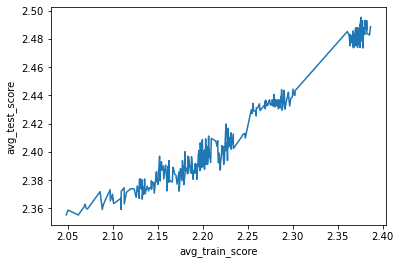

In [167]:
sns.lineplot(res_df["avg_train_score"],res_df["avg_test_score"])

# seeing the variation of the params with training scores and testing score top 10 -15 with facebook hiplot

In [168]:
columns_df=['param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'param_ccp_alpha','avg_train_score',
       'avg_test_score']

In [169]:
import hiplot as hip
# cols=["param_num_leaves","param_min_data_in_leaf","param_max_depth","avg_train_score","avg_test_score"]
hip.Experiment.from_dataframe(res_df[columns_df]).display()
plt.show()

<IPython.core.display.Javascript object>

# feature again shuffled on the basis of top result

In [171]:
random_forest_grid = {"max_depth": [6,7,8,9],
       "min_samples_leaf":[14,15,16,17],
       "n_estimators":[75,80,85,90],
        "min_samples_split" :[5,10,15,20,25,30,35]
        }

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.7min finished


2.347165420357603 2.041640596521559


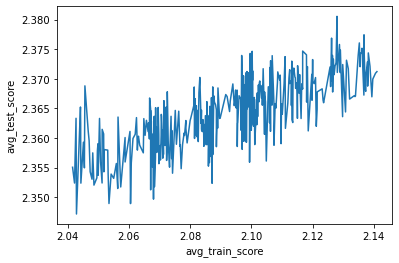

In [439]:
rd1 = random_forest_randomized_search(X,y,random_forest_grid,400)

res_df1 = pd.DataFrame(rd1.cv_results_)

res_df1["avg_train_score"]=np.sqrt(abs((res_df1["split0_train_score"]+res_df1["split1_train_score"]+res_df1["split2_train_score"])/3))
res_df1["avg_test_score"]=np.sqrt(abs((res_df1["split0_test_score"]+res_df1["split1_test_score"]+res_df1["split2_test_score"])/3))

print(res_df1["avg_test_score"].min(),res_df1["avg_train_score"].min())

sns.lineplot(res_df1["avg_train_score"],res_df1["avg_test_score"])



In [174]:
columns_df1=['param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth','avg_train_score',
       'avg_test_score']

import hiplot as hip
# cols=["param_num_leaves","param_min_data_in_leaf","param_max_depth","avg_train_score","avg_test_score"]
hip.Experiment.from_dataframe(res_df1[columns_df1]).display()
plt.show()

<IPython.core.display.Javascript object>

# best parameters selcted on the basis of random search and with the help of hiplot

In [175]:
final_random_forest = {"max_depth": 9,
       "min_samples_leaf":14,
       "n_estimators":75,
        "min_samples_split" :20
        }

In [176]:
rf_final_model = RandomForestRegressor(**final_random_forest)

In [177]:
rf_final_model.fit(X,y)

RandomForestRegressor(max_depth=9, min_samples_leaf=14, min_samples_split=20,
                      n_estimators=75)

In [183]:
y_pred_before_feature_importance  = rf_final_model.predict(X_test)

# score on unseen data that is Xtest which is 0.3 for the overaall dataset

In [184]:
np.sqrt(mean_squared_error(y_test,y_pred_before_feature_importance)) # score on predicted value

2.1957832821638688

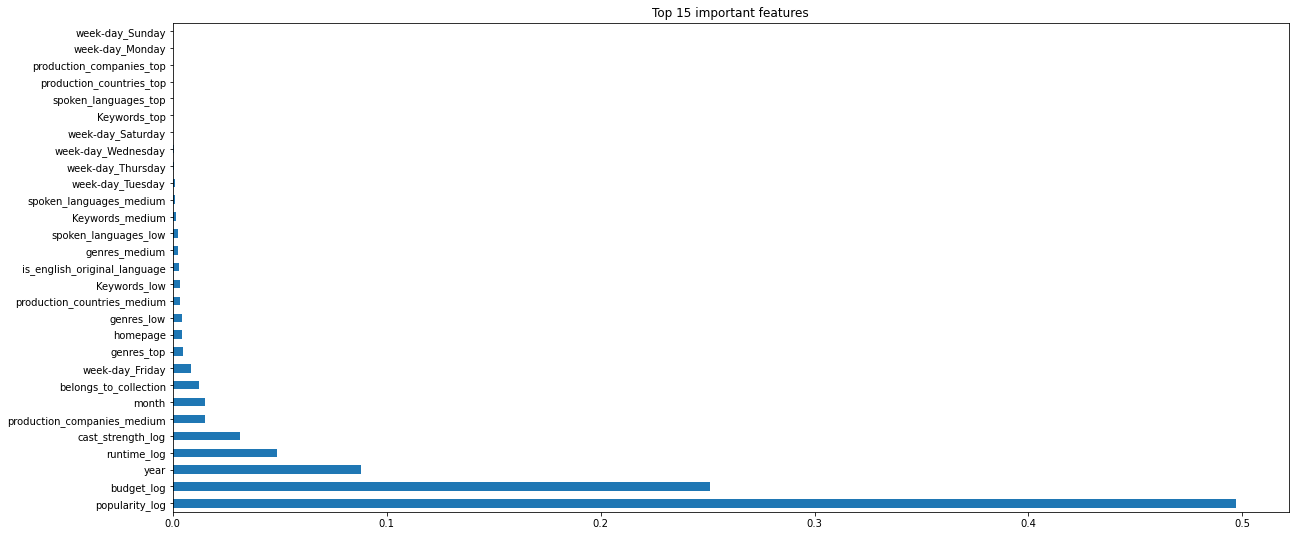

In [186]:
plt.figure(figsize=(20,9))
feat_importances = pd.Series(rf_final_model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [238]:
len(feat_importances)

29

# selecting top 20 features

In [234]:
feat_importance_selection = list(feat_importances.nlargest(20).index)

In [235]:
rf_final_model.fit(X[feat_importance_selection],y)

RandomForestRegressor(max_depth=9, min_samples_leaf=14, min_samples_split=20,
                      n_estimators=75)

In [236]:
y_predict_after_feature_selection   = rf_final_model.predict(X_test[feat_importance_selection])

In [237]:
np.sqrt(mean_squared_error(y_test,y_predict_after_feature_selection)) # score on predicted value

2.181515733261475

# small improvement is there after feature selection

In [239]:
test=pd.read_csv("test_after_preprocesing.csv")
test["budget_log"]=np.log1p(test["budget"])
test["cast_strength_log"]=np.log1p(test["cast_strength"])
test["crew_strength_log"]=np.log1p(test["crew_strength"])
test["runtime_log"]=np.log1p(test["runtime"])
test["popularity_log"]=np.log1p(test["popularity"])

cols_to_drop = ['production_countries_low','production_companies_low','budget','crew_strength_log','cast_strength','popularity','runtime',"crew_strength"]
test=pd.get_dummies(test)

test=test.drop(columns=cols_to_drop)

In [241]:
result = pd.read_csv("sample_submission.csv")
result["revenue"] = np.expm1(rf_final_model.predict(test[feat_importance_selection]))
result.to_csv("random_forest_prediction_with_feat_importance.csv",index=False)


# XGboost

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

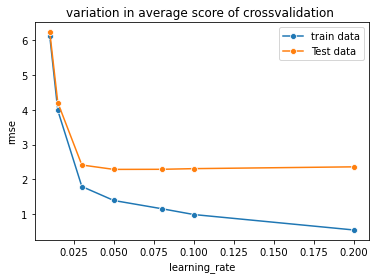

In [255]:
#exponential
learning_rate = [0.01,0.015,0.03,0.05,0.08,0.1,0.2]
train_score,test_score = [],[]
for i in learning_rate:
    xgb_model = xgb.XGBRegressor(learning_rate=i)
    cv = cross_validate(xgb_model,X[feat_importance_selection],y,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(learning_rate,train_score,label="train data",marker='o')
sns.lineplot(learning_rate,test_score,label="Test data",marker='o')
plt.xlabel("learning_rate")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

In [256]:
test_score

[6.225383954324812,
 4.2052731131252035,
 2.4128047289286823,
 2.2862357594270653,
 2.289006172362061,
 2.308099760256248,
 2.3599653161552396]

In [287]:
# xgboost_hyperparameters ={
#     "learning_rate" : [0.025,0.02,0.015,0.022,0.03],
#     "gamma" : [78,80,85,88,90,95,100],
#     "max_depth" : [2,3,4,5,6,7],
#     "reg_lambda"  : [78,80,85,88,90,95,100]
# }
xgboost_hyperparameters ={
    "n_estimators": [30,40,50,70,80,90,100],
    "learning_rate" : [0.025,0.03,0.04,0.05,0.06],
    "gamma" : [30,40,50,60,70,78,80],
    "max_depth" : [2,3,4,5,6,7],
    "reg_lambda"  : [78,80,85,88,90,95,100]
}

# random_grid = {"max_depth": [1,2,3],
#               "min_child_weight" : [200,210,220,230,250,270],
#               "n_estimators": [30,40,50,70,100,110,120,130,140,150,160,170,180,190,200],
#               "learning_rate": [0.05,0.06,0.07,0.08,0.1],
# #               "alpha":[70,80,90,100,110],
#               "gamma":[75,28,83,87,93,97,100]}

In [288]:
xgb_model = xgb_randomized_search(X,y,xgboost_hyperparameters,200)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   43.0s finished


In [289]:
res_xgb = pd.DataFrame(xgb_model.cv_results_)

2.322342770053763 2.069673905788388


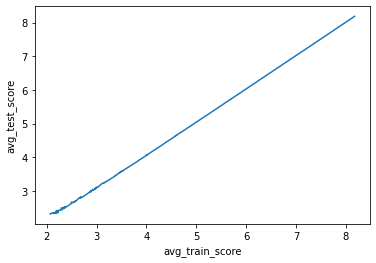

In [290]:
res_xgb = pd.DataFrame(xgb_model.cv_results_)

res_xgb["avg_train_score"]=np.sqrt(abs((res_xgb["split0_train_score"]+res_xgb["split1_train_score"]+res_xgb["split2_train_score"])/3))
res_xgb["avg_test_score"]=np.sqrt(abs((res_xgb["split0_test_score"]+res_xgb["split1_test_score"]+res_xgb["split2_test_score"])/3))

print(res_xgb["avg_test_score"].min(),res_xgb["avg_train_score"].min())

sns.lineplot(res_xgb["avg_train_score"],res_xgb["avg_test_score"])


In [291]:
columns_df1=['param_n_estimators', 'param_max_depth',
       'param_reg_lambda', 'param_learning_rate',"param_gamma",'avg_train_score',
       'avg_test_score']

import hiplot as hip
# cols=["param_num_leaves","param_min_data_in_leaf","param_max_depth","avg_train_score","avg_test_score"]
hip.Experiment.from_dataframe(res_xgb[columns_df1]).display()
plt.show()

<IPython.core.display.Javascript object>

In [292]:
hyperparameter_best_xgboost = {
    
    "n_estimators": 90,
    "learning_rate" : 0.06,
    "gamma" : 30,
    "max_depth" : 5,
    "reg_lambda"  : 85
}


In [293]:
xgb_final_model_before_feat_engineering = xgb.XGBRegressor(**hyperparameter_best_xgboost) 

In [294]:
xgb_final_model_before_feat_engineering.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=30, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=85, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [295]:
y_predict_before_preprocessing_xgb = xgb_final_model_before_feat_engineering.predict(X_test)

In [296]:
np.sqrt(mean_squared_error(y_test,y_predict_before_preprocessing_xgb))

2.1505430289519616

In [297]:
xgb_final_model_before_feat_engineering.feature_importances_

array([0.0727449 , 0.03046472, 0.03286719, 0.04546973, 0.0288066 ,
       0.03501974, 0.04272878, 0.02080178, 0.        , 0.04799884,
       0.        , 0.02471113, 0.        , 0.05448332, 0.04156105,
       0.03447987, 0.        , 0.03235727, 0.12275415, 0.04677511,
       0.04105597, 0.08163636, 0.02405222, 0.02929459, 0.02367369,
       0.03657102, 0.0230493 , 0.02664276, 0.        ], dtype=float32)

In [298]:
result = pd.read_csv("sample_submission.csv")
result["revenue"] = np.expm1(xgb_final_model_before_feat_engineering.predict(test))
result.to_csv("xgb_without_feat_importance.csv",index=False)
#2.21

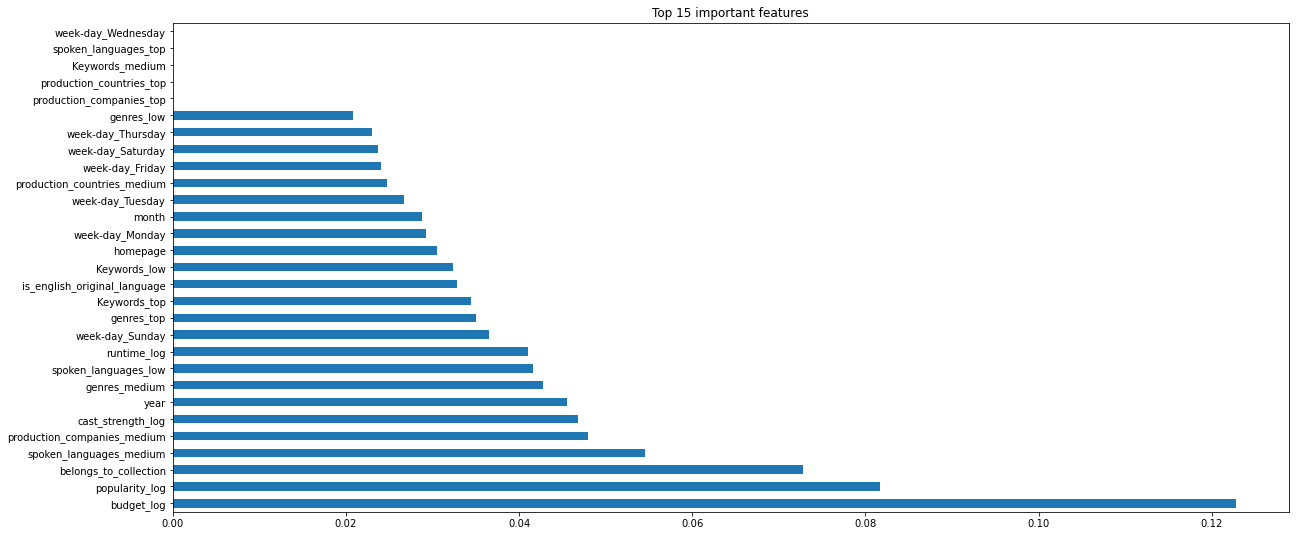

In [302]:
plt.figure(figsize=(20,9))
feat_importances_xgb = pd.Series(xgb_final_model_before_feat_engineering.feature_importances_, index=X.columns)
feat_importances_xgb.nlargest(35).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [318]:
feat_importance_selection_xgb_list = list(feat_importances_xgb.nlargest(20).index)

In [319]:
xgb_final_model_before_feat_engineering.fit(X[feat_importance_selection_xgb_list],y)
y_predict_after_preprocessing_feat_selectin_xgb = xgb_final_model_before_feat_engineering.predict(X_test[feat_importance_selection_xgb_list])
np.sqrt(mean_squared_error(y_test,y_predict_after_preprocessing_feat_selectin_xgb))

2.148259094052475

In [320]:
result = pd.read_csv("sample_submission.csv")
result["revenue"] = np.expm1(xgb_final_model_before_feat_engineering.predict(test[feat_importance_selection_xgb_list]))
result.to_csv("xgb_with_feat_importance.csv",index=False)
#2.21

# lightgbm

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

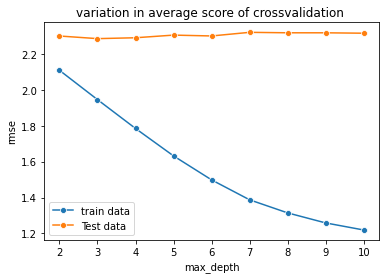

In [321]:
max_depth = [2,3,4,5,6,7,8,9,10]
# max_depth = [10,12,14,16,18]

train_score,test_score = [],[]
for i in max_depth:
    lgb_model = lgb.LGBMRegressor(max_depth=i)
    cv = cross_validate(lgb_model,X,y,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(max_depth,train_score,label="train data",marker='o')
sns.lineplot(max_depth,test_score,label="Test data",marker='o')
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

In [335]:
lgb_hyperparameters ={
    "min_data_in_leaf" :[5,6,7,8,9,10],
    "num_leaves" : [10,15,20,25,50],
    "max_depth" : [2,3,4,5,6]
}

# lgb_hyperparameters ={
#     "min_data_in_leaf" :[250,300,350,375,400],
#     "num_leaves" : [5,10,15,20,25,30],
#     "max_depth" : [2,3,4,5,6,7]
# }

    

    

In [337]:
lgb_m = lgb_randomized_search(X,y,lgb_hyperparameters,400)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    3.8s


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 29
[LightGBM] [Info] Start training from score 15.943383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    7.4s finished


In [338]:
res_lgb = pd.DataFrame(lgb_m.cv_results_)

2.30430638071369 0.9706024487489725


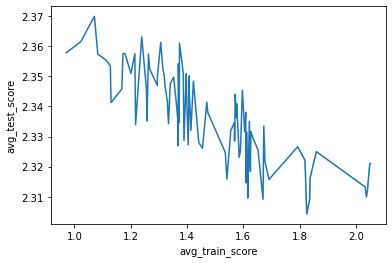

In [339]:
res_lgb = pd.DataFrame(lgb_m.cv_results_)

res_lgb["avg_train_score"]=np.sqrt(abs((res_lgb["split0_train_score"]+res_lgb["split1_train_score"]+res_lgb["split2_train_score"])/3))
res_lgb["avg_test_score"]=np.sqrt(abs((res_lgb["split0_test_score"]+res_lgb["split1_test_score"]+res_lgb["split2_test_score"])/3))

print(res_lgb["avg_test_score"].min(),res_lgb["avg_train_score"].min())

sns.lineplot(res_lgb["avg_train_score"],res_lgb["avg_test_score"])


In [340]:

columns_lgb1=['param_min_data_in_leaf', 'param_max_depth',
       'param_num_leaves','avg_train_score',
       'avg_test_score']

import hiplot as hip
# cols=["param_num_leaves","param_min_data_in_leaf","param_max_depth","avg_train_score","avg_test_score"]
hip.Experiment.from_dataframe(res_lgb[columns_df1]).display()
plt.show()

<IPython.core.display.Javascript object>

In [388]:
lgb_paramas_final = {'num_leaves': 10, 'min_data_in_leaf': 10, 'max_depth': 2}
lgb_model_before_feature=lgb.LGBMRegressor(**lgb_paramas_final)
lgb_model_before_feature.fit(X,y)
print(np.sqrt(mean_squared_error(y, lgb_model_before_feature.predict(X))))
y_pred_lgb_before_feature_importance = lgb_model_before_feature.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_lgb_before_feature_importance))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
2.0975128087655177


2.148501846426937

In [389]:
lgb_model_before_feature.feature_importances_

array([ 9,  8,  1, 49, 20,  9,  0,  0,  4, 10,  0,  0,  1,  0,  1,  2,  0,
        7, 64, 16, 18, 52,  1,  0,  6,  4,  1,  5,  0])

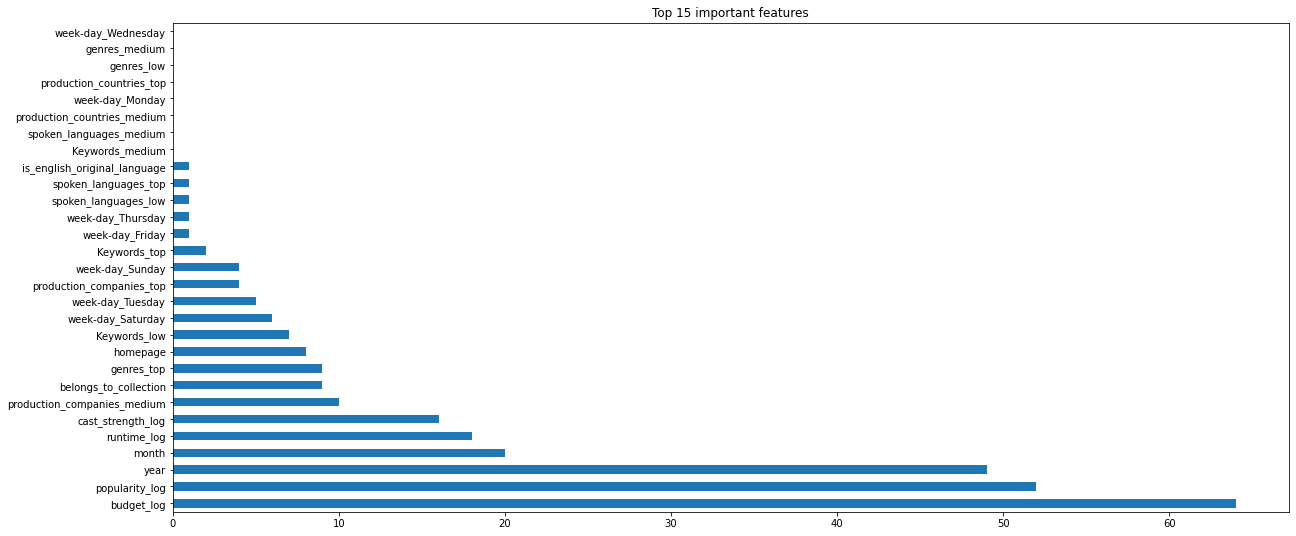

In [390]:
plt.figure(figsize=(20,9))
feat_importances_lgb = pd.Series(lgb_model_before_feature.feature_importances_, index=X.columns)
feat_importances_lgb.nlargest(35).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [391]:
result = pd.read_csv("sample_submission.csv")
result["revenue"] = np.expm1(lgb_model_before_feature.predict(test))
result.to_csv("lgb_without_feat_importance.csv",index=False)

In [392]:
feat_importance_selection_lgb_list = list(feat_importances_lgb.nlargest(20).index)

In [393]:
lgb_model_before_feature.fit(X[feat_importance_selection_lgb_list],y)
y_predict_after_preprocessing_feat_selectin_lgb = lgb_model_before_feature.predict(X_test[feat_importance_selection_lgb_list])
np.sqrt(mean_squared_error(y_test,y_predict_after_preprocessing_feat_selectin_lgb))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


2.140312911880699

In [394]:
result = pd.read_csv("sample_submission.csv")
result["revenue"] = np.expm1(lgb_model_before_feature.predict(test[feat_importance_selection_lgb_list]))
result.to_csv("lgb_with_feat_importance.csv",index=False)

# catboost

In [415]:
cb_model = cb.CatBoostRegressor(iterations=190,depth=5)
cb_model.fit(X,y)


Learning rate set to 0.157363
0:	learn: 2.9633491	total: 2.92ms	remaining: 552ms
1:	learn: 2.8467757	total: 5.91ms	remaining: 556ms
2:	learn: 2.7455783	total: 9.03ms	remaining: 563ms
3:	learn: 2.6621252	total: 12.2ms	remaining: 568ms
4:	learn: 2.5985994	total: 15.8ms	remaining: 585ms
5:	learn: 2.5311516	total: 19.7ms	remaining: 604ms
6:	learn: 2.4791484	total: 22.8ms	remaining: 596ms
7:	learn: 2.4243583	total: 28.2ms	remaining: 642ms
8:	learn: 2.3807999	total: 31.5ms	remaining: 634ms
9:	learn: 2.3538361	total: 34.8ms	remaining: 626ms
10:	learn: 2.3247603	total: 38ms	remaining: 618ms
11:	learn: 2.3040817	total: 41.2ms	remaining: 611ms
12:	learn: 2.2771073	total: 44.5ms	remaining: 606ms
13:	learn: 2.2514649	total: 47.8ms	remaining: 601ms
14:	learn: 2.2286779	total: 51.2ms	remaining: 597ms
15:	learn: 2.2150148	total: 54.1ms	remaining: 589ms
16:	learn: 2.1973320	total: 57.8ms	remaining: 589ms
17:	learn: 2.1884076	total: 61.1ms	remaining: 584ms
18:	learn: 2.1776172	total: 64.2ms	remaining: 

In [416]:
y_pred =cb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

2.088185128475303

In [417]:
result = pd.read_csv("sample_submission.csv")
result["revenue"] = np.expm1(cb_model.predict(test))
result.to_csv("cb_without_feat_importance.csv",index=False)

In [418]:
cb_model.feature_importances_

array([ 2.56067029,  1.84509414,  1.93503333, 13.28206644,  5.14213589,
        2.33587678,  0.68716492,  1.2128759 ,  0.23650516,  3.45350805,
        0.52695567,  1.45273197,  0.59960047,  1.15149729,  0.97624414,
        0.67258626,  0.29942786,  0.95424248, 19.43886984,  6.20792279,
        7.62846911, 23.40971889,  0.78116209,  0.5363388 ,  0.60644749,
        0.39461363,  0.76753357,  0.57743725,  0.32726948])

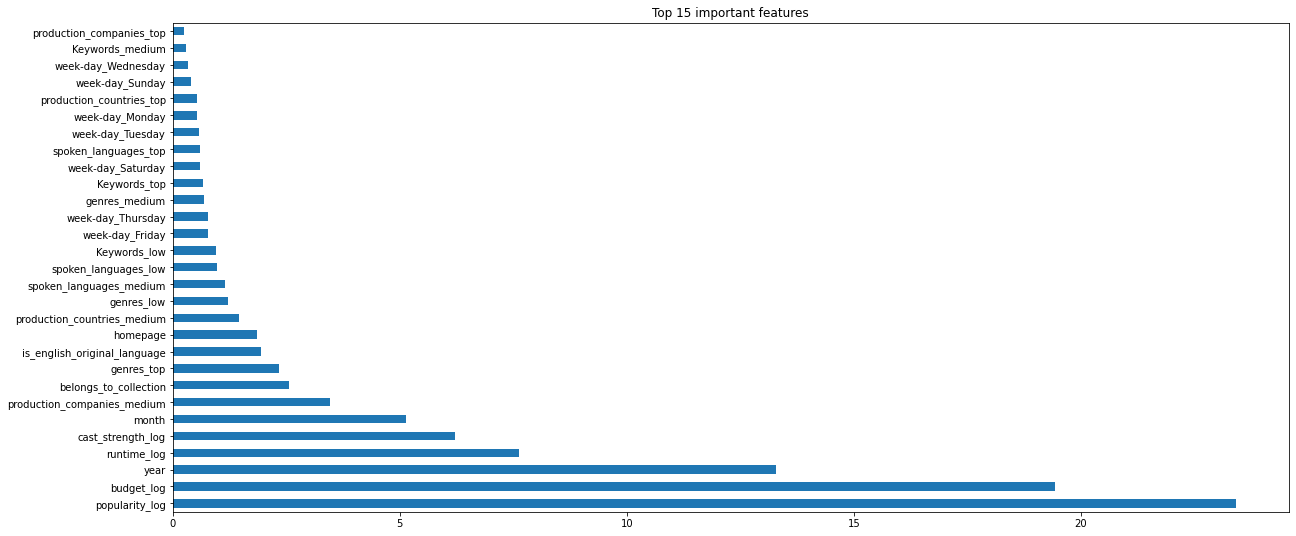

In [420]:
plt.figure(figsize=(20,9))
feat_importances_cb = pd.Series(cb_model.feature_importances_, index=X.columns)
feat_importances_cb.nlargest(35).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [436]:
feat_importance_selection_cb_list = list(feat_importances_cb.nlargest(18).index)

In [437]:
cb_model_after = cb.CatBoostRegressor(iterations=190,depth=5,verbose=0)
cb_model_after.fit(X[feat_importance_selection_cb_list],y)
y_pred_after =cb_model_after.predict(X_test[feat_importance_selection_cb_list])
np.sqrt(mean_squared_error(y_test,y_pred_after))


2.0968490215030626

In [438]:
result = pd.read_csv("sample_submission.csv")
result["revenue"] = np.expm1(cb_model_after.predict(test))
result.to_csv("cb_with_feat_importance.csv",index=False)